In [2]:
import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.transforms.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path_abejita = '/content/drive/Shareddrives/Detección de polinizadores/iNaturalist/Hymenoptera/Hymenoptera_2637.jpg'
path_mariposita = '/content/drive/Shareddrives/Detección de polinizadores/iNaturalist/Lepidoptera/Lepidoptera_38410.jpg'
path_obama = '/content/drive/Shareddrives/Detección de polinizadores/Código/obama.jpg'

In [13]:
img_abejita = cv2.imread(path_abejita)
img_mariposita = cv2.imread(path_mariposita)
img_obama = cv2.imread(path_obama)

In [ ]:
img_abejita

In [15]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
# Cargar el modelo preentrenado
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Cambiar a modo de evaluación

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [19]:
from PIL import Image

def pred_with_torch_model(image_path):
  image = Image.open(image_path).convert("RGB")
  image_tensor = F.to_tensor(image).unsqueeze(0)   # Convertir a tensor y añadir dimensión batch

    # Hacer predicción
  with torch.no_grad():
      predictions = model(image_tensor)

  # Extraer las cajas delimitadoras, etiquetas y puntuaciones
  boxes = predictions[0]['boxes']
  labels = predictions[0]['labels']
  scores = predictions[0]['scores']

  # Dibujar las cajas delimitadoras en la imagen
  image_np = image_tensor.squeeze().permute(1, 2, 0).numpy()

  plt.figure(figsize=(12, 8))
  plt.imshow(image_np)

  # Filtrar las detecciones con una puntuación alta (por ejemplo, >0.5)
  threshold = 0.6

  #dict_temp = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}

  for box, score, label in zip(boxes, scores, labels):
      if score > threshold:
          xmin, ymin, xmax, ymax = box

          #dict_temp['xmin'].append(float(xmin))
          #dict_temp['ymin'].append(float(ymin))
          #dict_temp['xmax'].append(float(xmax))
          #dict_temp['ymax'].append(float(ymax))

          plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                                            edgecolor='red', facecolor='none', linewidth=2))

  plt.axis('off')
  plt.show()

  #return dict_temp


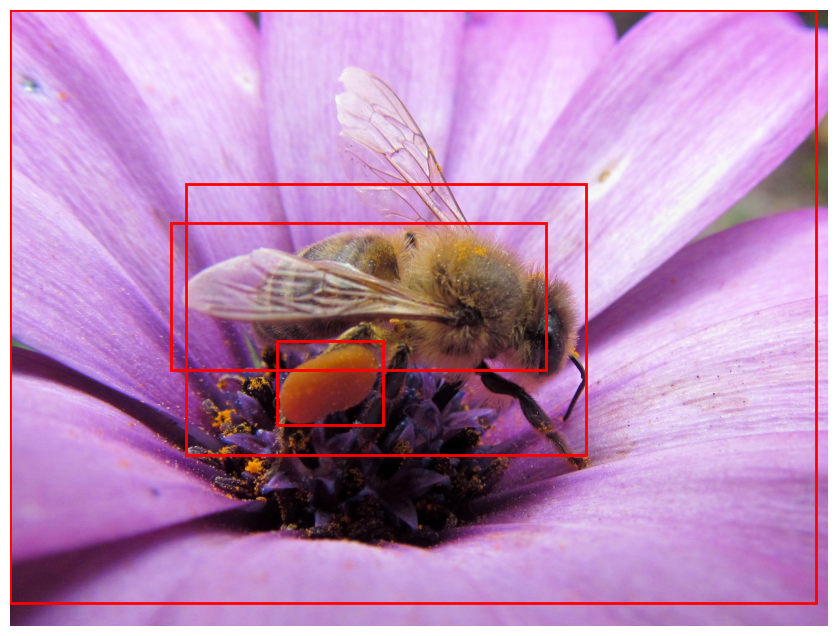

In [20]:
pred_with_torch_model(path_abejita)

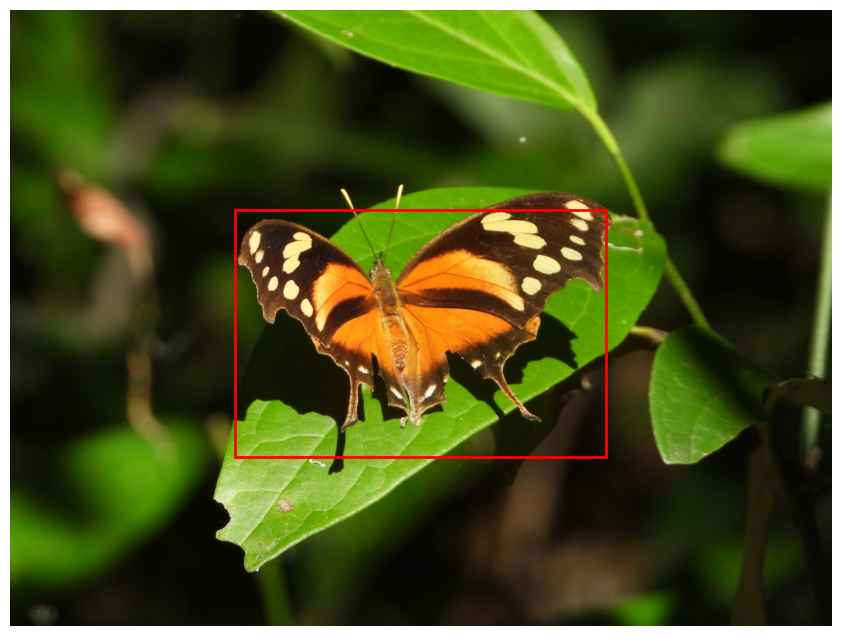

In [21]:
pred_with_torch_model(path_mariposita)

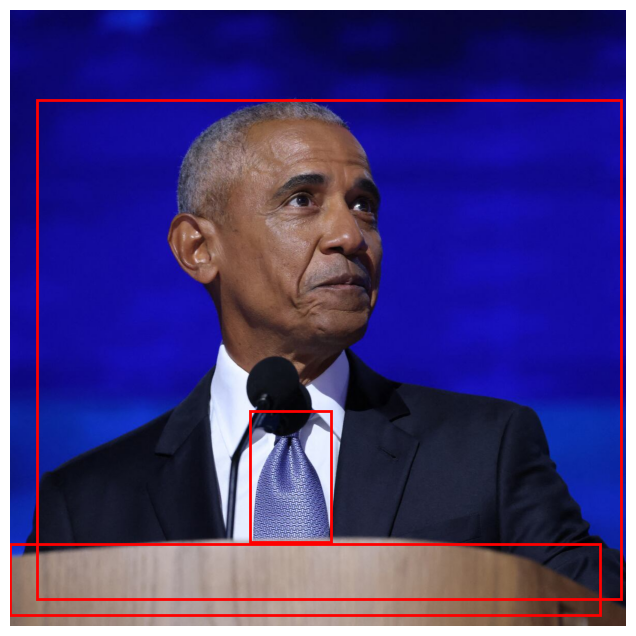

In [22]:
pred_with_torch_model(path_obama)

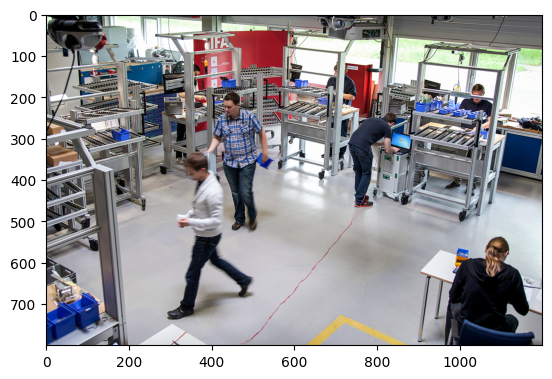

In [ ]:
!wget https://www.uni-hannover.de/fileadmin/luh/studiengaenge/Produktion_und_Logistik_Master/produktion_und_logistik_master.jpg -q -O input.jpg
img = cv2.imread("./input.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
def img_transform(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
  img /= 255.0
  img = torch.from_numpy(img).permute(2,0,1)
  return img

In [23]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='COCO_V1').to(device)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [24]:
def inference(img, model, detection_threshold=0.70):

  model.eval()

  img = img.to(device)
  outputs = model([img])

  boxes = outputs[0]['boxes'].data.cpu().numpy()
  scores = outputs[0]['scores'].data.cpu().numpy()
  labels = outputs[0]['labels'].data.cpu().numpy()

  boxes = boxes[scores >= detection_threshold].astype(np.int32)
  labels = labels[scores >= detection_threshold]
  scores = scores[scores >= detection_threshold]

  return boxes, scores, labels

In [25]:
import matplotlib.patches as patches

def plot_image(img, boxes, scores, labels, dataset, save_path=None):

  cmap = plt.get_cmap("tab20b")
  class_labels = np.array(dataset)
  colors = [cmap(i) for i in np.linspace(0, 1, len(class_labels))]
  height, width, _ = img.shape

  fig, ax = plt.subplots(1, figsize=(16, 8))

  ax.imshow(img)
  for i, box in enumerate(boxes):
    class_pred = labels[i]
    conf = scores[i]
    width = box[2] - box[0]
    height = box[3] - box[1]
    rect = patches.Rectangle(
        (box[0], box[1]),
        width,
        height,
        linewidth=2,
        edgecolor=colors[int(class_pred)],
        facecolor="none",
    )

    ax.add_patch(rect)
    plt.text(
        box[0], box[1],
        s=class_labels[int(class_pred)] + " " + str(int(100*conf)) + "%",
        color="white",
        verticalalignment="top",
        bbox={"color": colors[int(class_pred)], "pad": 0},
    )

  if save_path is not None:
    plt.savefig(save_path)

  plt.show()

In [ ]:
img = img_transform(img)
boxes, scores, labels = inference(img, model)

In [27]:
img_abejita = img_transform(img_abejita)
boxes_abejita, scores_abejita, labels_abejita = inference(img_abejita, model)

In [28]:
img_mariposita = img_transform(img_mariposita)
boxes_mariposita, scores_mariposita, labels_mariposita = inference(img_mariposita, model)

In [29]:
img_obama = img_transform(img_obama)
boxes_obama, scores_obama, labels_obama = inference(img_obama, model)

In [33]:
with open('/content/drive/Shareddrives/Detección de polinizadores/Código/data/coco-labels-2014_2017.txt', 'r') as coco:
  COCO_LABELS = coco.readlines()

for i, _ in enumerate(COCO_LABELS):
  COCO_LABELS[i] = COCO_LABELS[i].replace("\n", "")


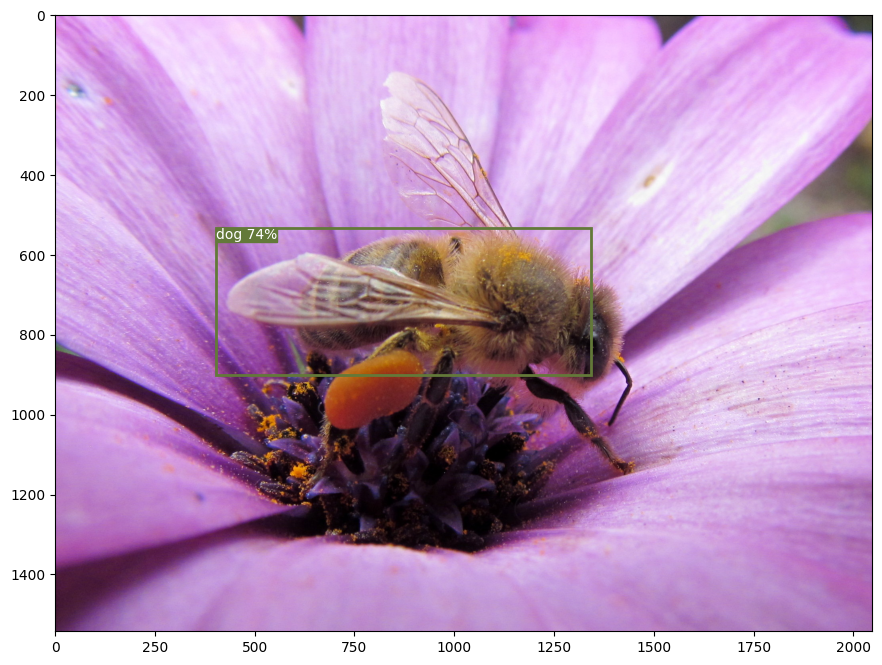

In [34]:
img_abejita = img_abejita.cpu().permute(1,2,0).numpy()
plot_image(img_abejita, boxes_abejita, scores_abejita, labels_abejita, COCO_LABELS)

In [ ]:
img_mariposita = img_mariposita.cpu().permute(1,2,0).numpy()
plot_image(img_mariposita, boxes_mariposita, scores_mariposita, labels_mariposita, COCO_LABELS)

In [ ]:
img_obama = img_obama.cpu().permute(1,2,0).numpy()
plot_image(img_obama, boxes_obama, scores_obama, labels_obama, COCO_LABELS)

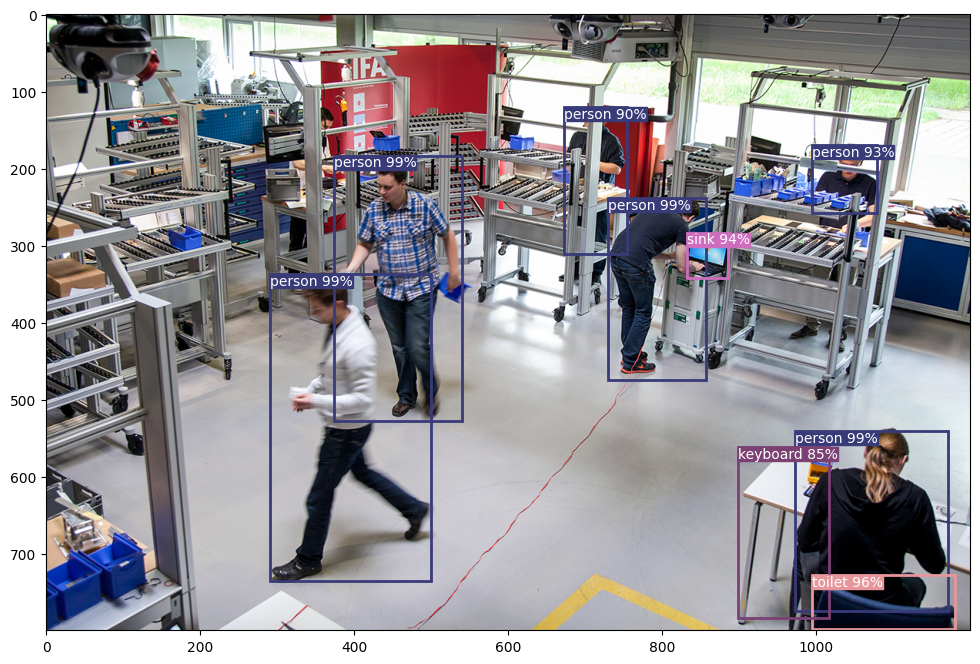

In [ ]:
img = img.cpu().permute(1,2,0).numpy()
plot_image(img, boxes, scores, labels, COCO_LABELS)

In [ ]:
path_im = "/content/doggy.jpg"
img = cv2.imread(path_im)

In [ ]:
img = img_transform(img)
boxes, scores, labels = inference(img, model)

In [ ]:
boxes, scores, labels

(array([[ 207,   77, 1140,  834],
        [ 234,   99, 1117,  797]], dtype=int32),
 array([0.95653486, 0.8266016 ], dtype=float32),
 array([18, 17]))

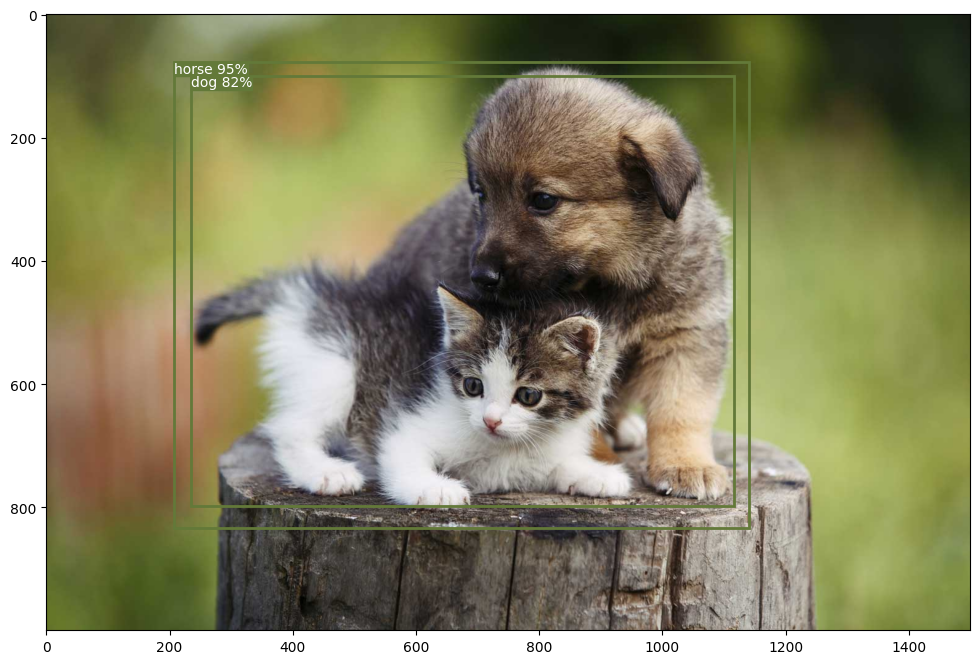

In [ ]:
img = img.cpu().permute(1,2,0).numpy()
plot_image(img, boxes, scores, labels, COCO_LABELS)